# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Attrition', ylabel='count'>

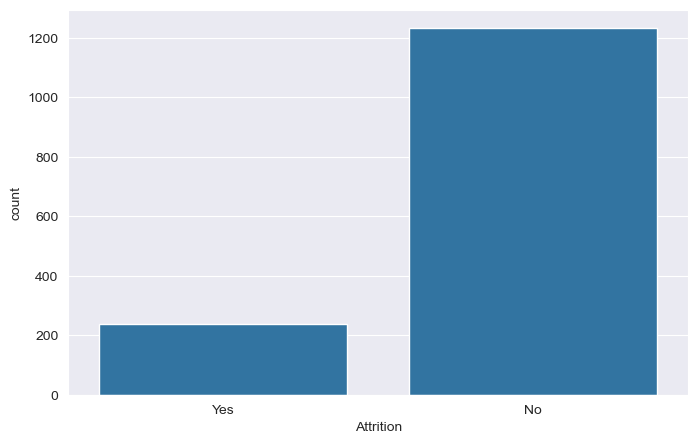

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Attrition'], data=df)

In [13]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

<Axes: xlabel='PerformanceRating', ylabel='count'>

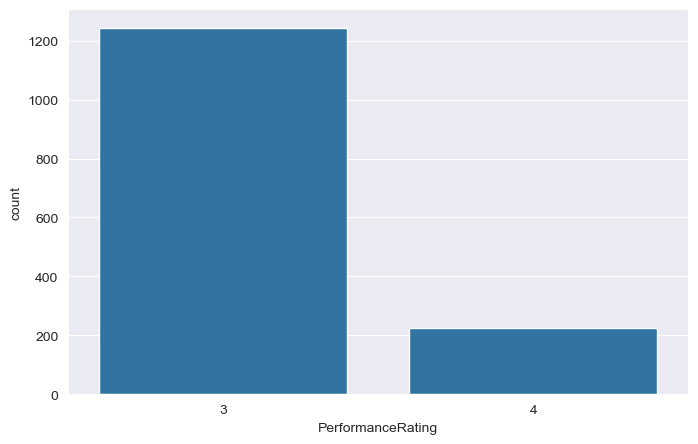

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['PerformanceRating'], data=df)

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


# Exploratory Data Analysis

## 2.2 Data Cleaning

### 2.2.1 Drop Duplicate

In [16]:
df = df.drop_duplicates()

In [19]:
df['MaritalStatus'].value_counts().sort_index()

MaritalStatus
Divorced    327
Married     673
Single      470
Name: count, dtype: int64

In [ ]:
df_heatmap = df.copy()
df_heatmap = df_heatmap.drop(['Attrition', 'BusinessTravel'], axis=1)

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

## 2.2 Data Exploration

### 2.2.1 Target Class Distribution

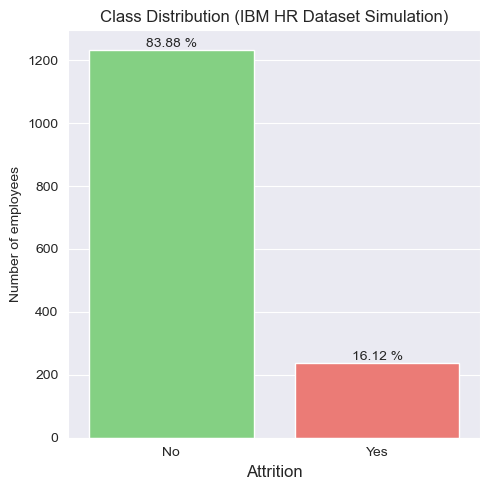

In [30]:
plt.figure(figsize = (5,5))
graph_target = sns.countplot(x="Attrition", data=df, palette=['#77DD76','#FF6962'], order=df['Attrition'].value_counts().index)

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * df["Attrition"].value_counts().iloc[i] / len(df),2)
    
    str_plot = f'{percentage} %'

    graph_target.text(p.get_x()+p.get_width()/2., height + 10, str_plot, ha="center")
    i += 1

plt.title('Class Distribution (IBM HR Dataset Simulation)')
plt.xticks([0,1])
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Number of employees')
plt.tight_layout()

### 2.2.2 Numerical Features

In [39]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

#### Age

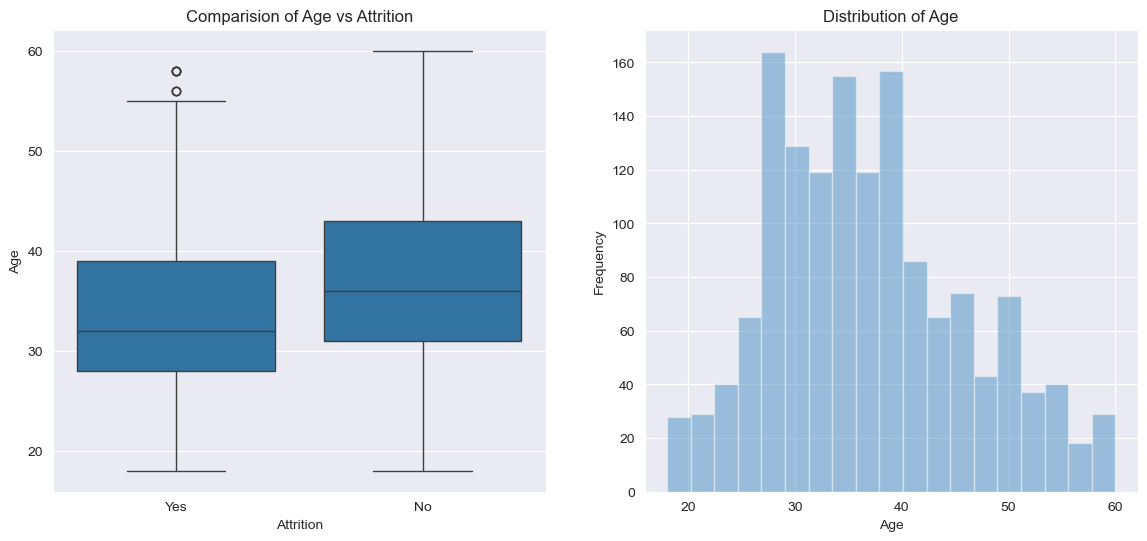

In [40]:
NumericalVariables_targetPlots(df,segment_by="Age")

Orang yang tidak meninggalkan perusahaan berada di atas usia 30 tahun

#### Daily Rate & Montly Income & HourlyRate

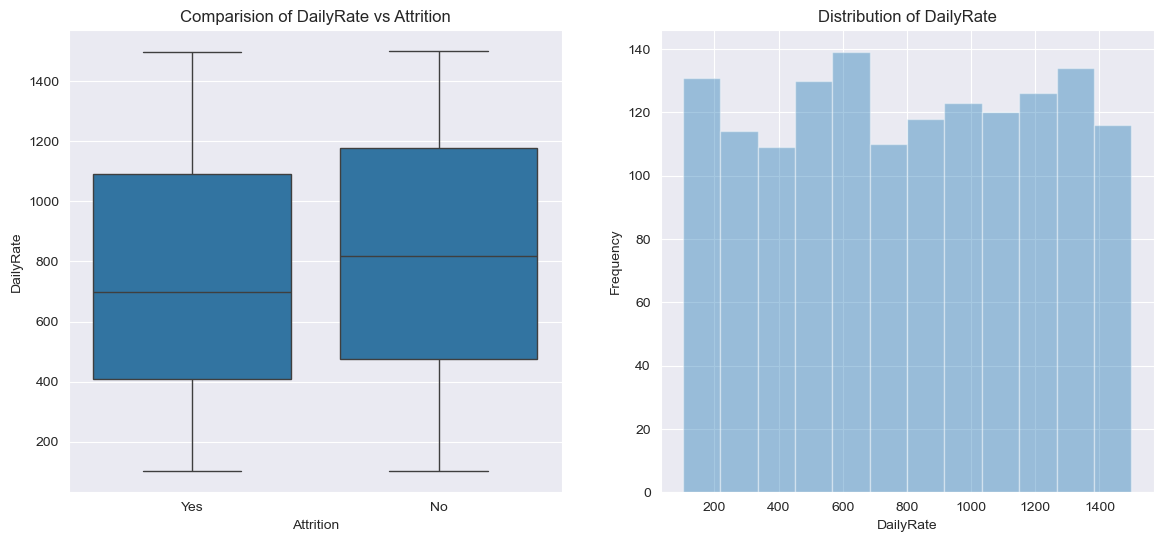

In [41]:
NumericalVariables_targetPlots(df,"DailyRate")

Employee dengan tingkat daily rates rendah rentan untuk meninggalkan perusahaan

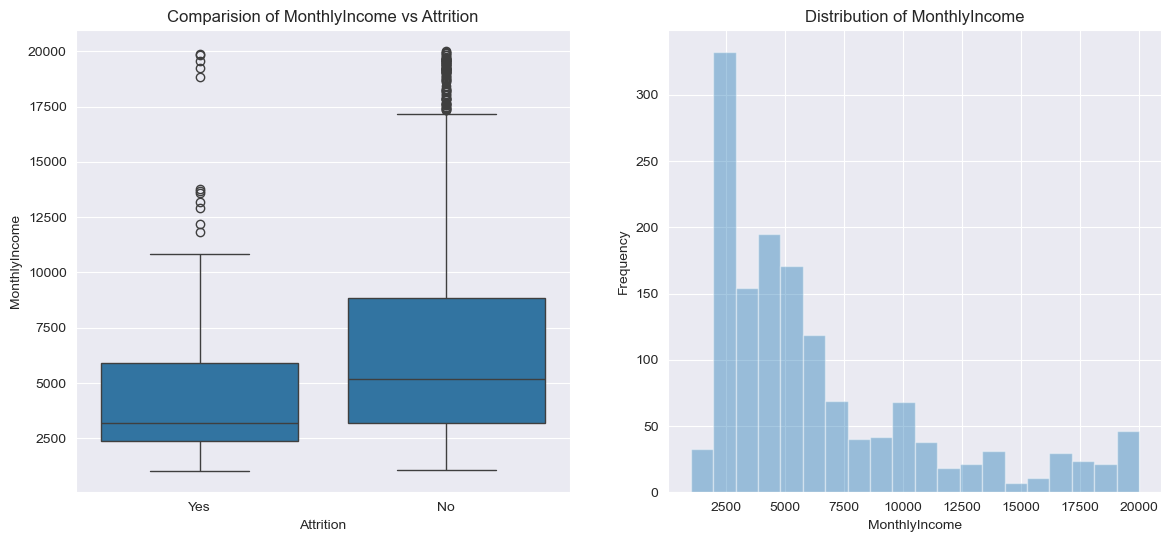

In [43]:
NumericalVariables_targetPlots(df,"MonthlyIncome")

Semakin rendah income per bulan, semakin besar kemungkinan employee untuk meninggalkan perusahaan

#### Hourly Rate

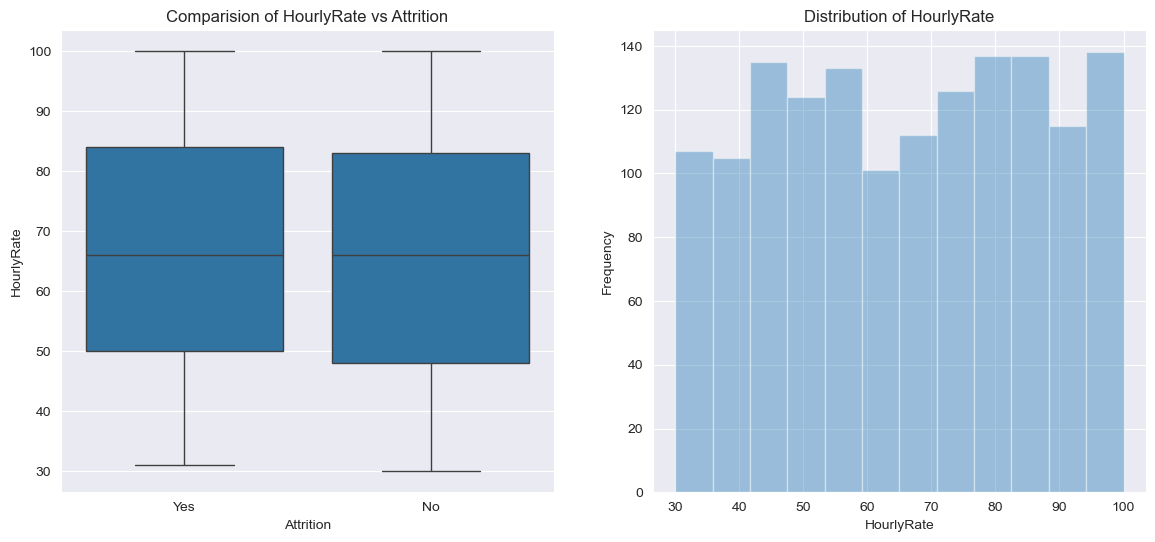

In [44]:
NumericalVariables_targetPlots(df,"HourlyRate")

Tidak terlalu signifikan. Namun, employee dengna hourly rate tinggi rawan meninggalkan perusahaan

#### Percent Salary Hike

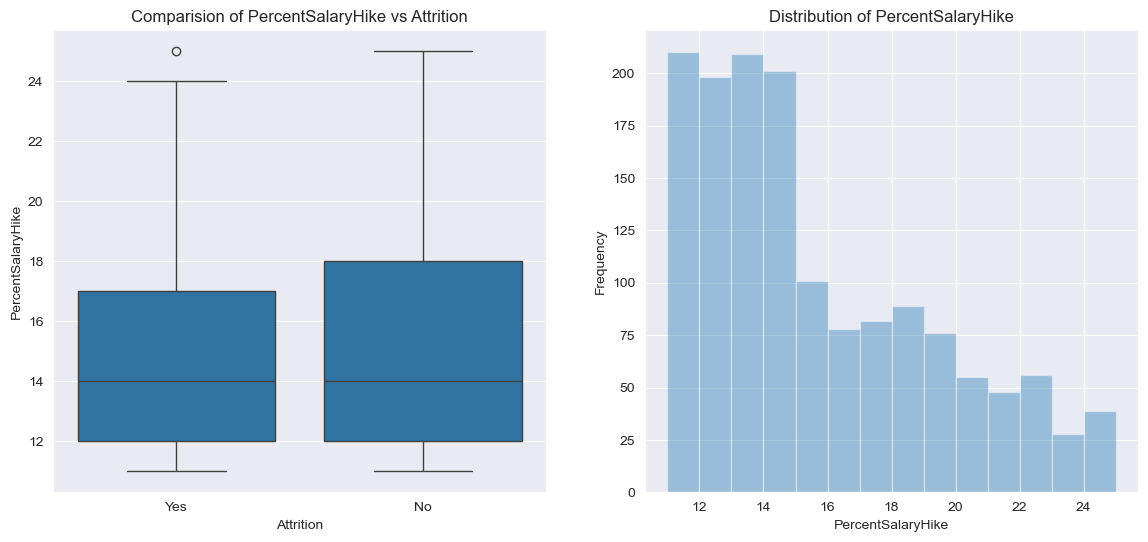

In [45]:
NumericalVariables_targetPlots(df,"PercentSalaryHike")

#### Total Working Years

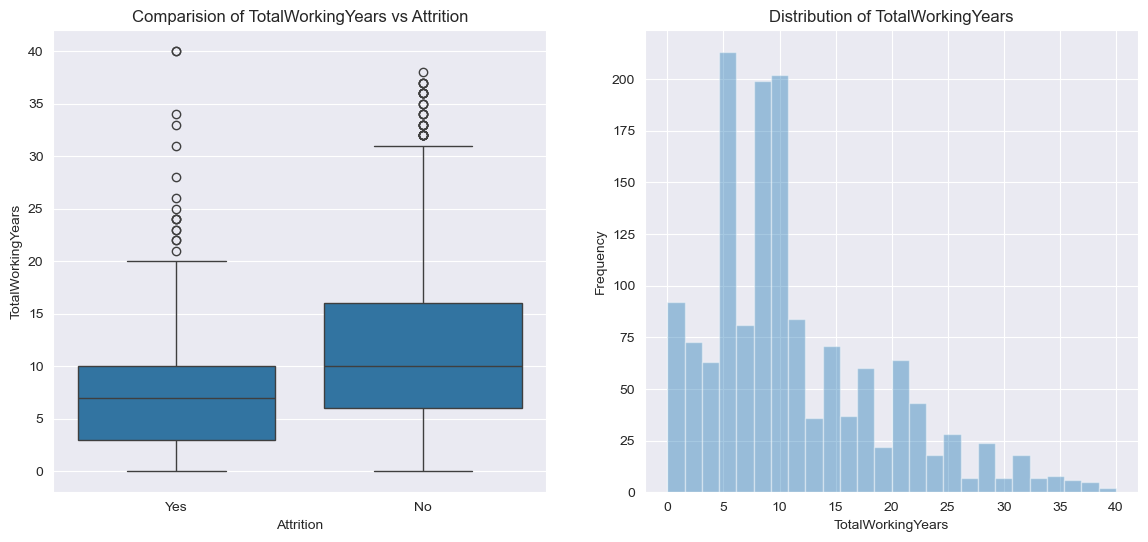

In [46]:
NumericalVariables_targetPlots(df,"TotalWorkingYears")

Dari sini, semakin lama employee bekerja, kemungkinan untuk meninggalkan perusahaan semakin kecil. Apakah ini indikasi terjebak di zona nyaman?

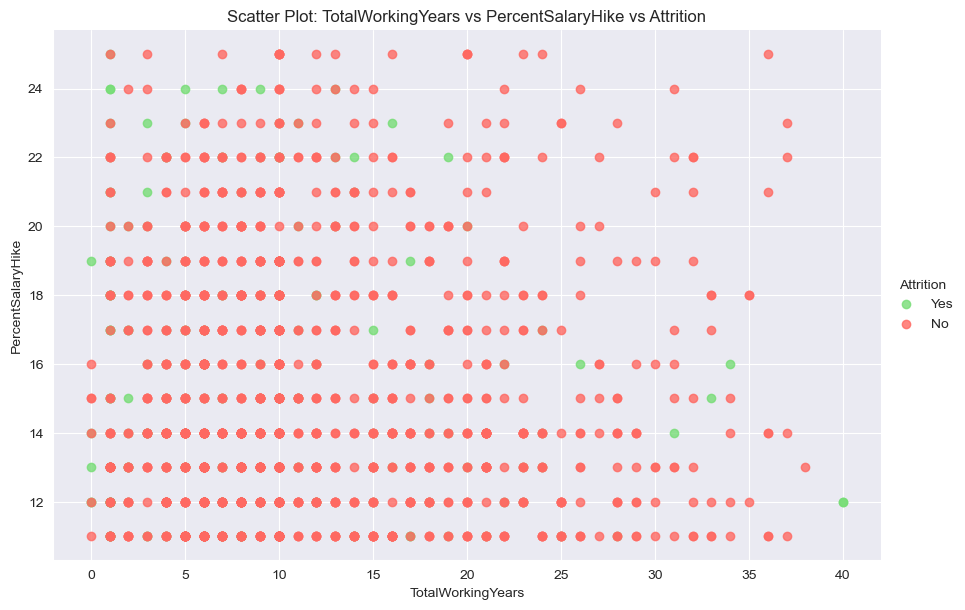

In [52]:
sns.lmplot(x="TotalWorkingYears", y="PercentSalaryHike", data=df, 
           fit_reg=False, 
           hue="Attrition", 
           height=6,
           aspect=1.5, 
           palette=['#77DD76','#FF6962']) 

plt.title("Scatter Plot: TotalWorkingYears vs PercentSalaryHike vs Attrition")
plt.show()

### 2.2.3 Categorical Features

In [59]:
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

print(df[['Attrition', 'Attrition_Numeric']].head())

  Attrition  Attrition_Numeric
0       Yes                  1
1        No                  0
2       Yes                  1
3        No                  0
4        No                  0


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def CategoricalVariables_targetPlots(df, segment_by, invert_axis=False):
    
    fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
    
    if invert_axis == False:
        sns.countplot(x=segment_by, data=df, hue="Attrition", ax=ax[0], palette=['#77DD76','#FF6962'])
    else:
        sns.countplot(y=segment_by, data=df, hue="Attrition", ax=ax[0], palette=['#77DD76','#FF6962'])
        
    ax[0].set_title(f"Comparison of {segment_by} vs Attrition")
    
    if invert_axis == False:
        sns.barplot(x=segment_by, y="Attrition_Numeric", data=df, ci=None, ax=ax[1])
    else:
        sns.barplot(y=segment_by, x="Attrition_Numeric", data=df, ci=None, ax=ax[1])
        
    ax[1].set_title(f"Attrition Rate by {segment_by}")
    ax[1].set_ylabel("Attrition Probability (0.0 - 1.0)")
    
    plt.tight_layout()
    plt.show()

#### Job Involvement

In [53]:
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [54]:
round(df.JobInvolvement.value_counts()/df.shape[0] * 100,2)

JobInvolvement
3    59.05
2    25.51
4     9.80
1     5.65
Name: count, dtype: float64

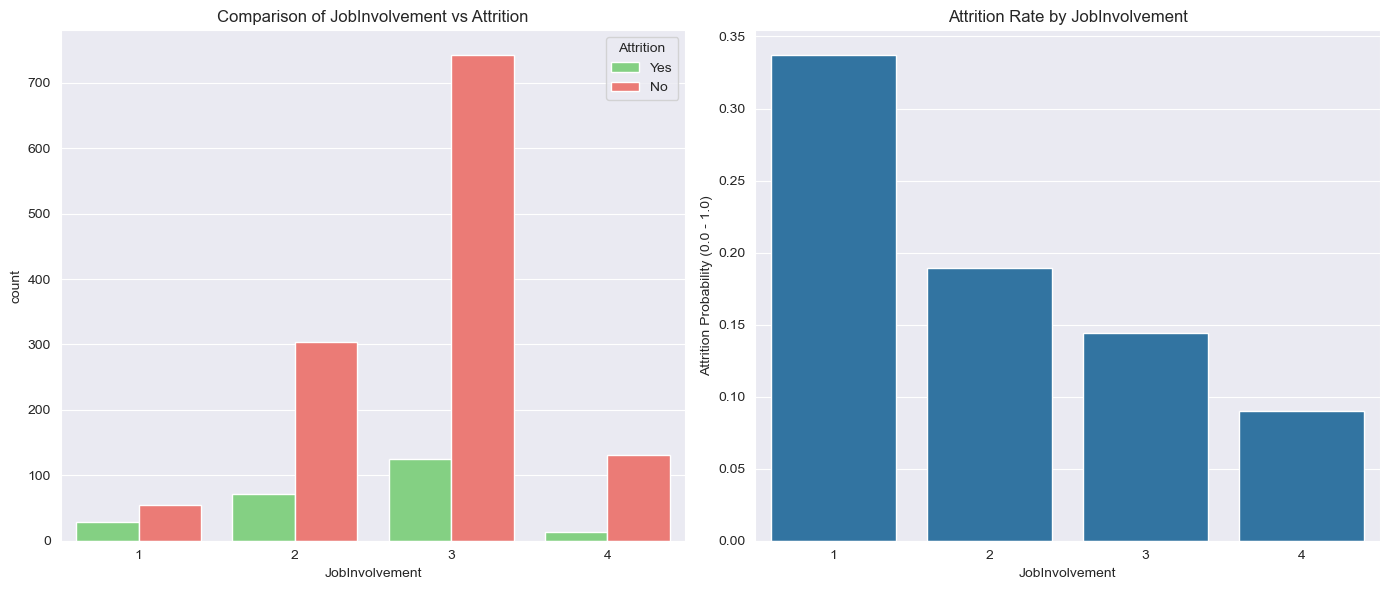

In [61]:
CategoricalVariables_targetPlots(df,"JobInvolvement")

#### Job Satisfaction

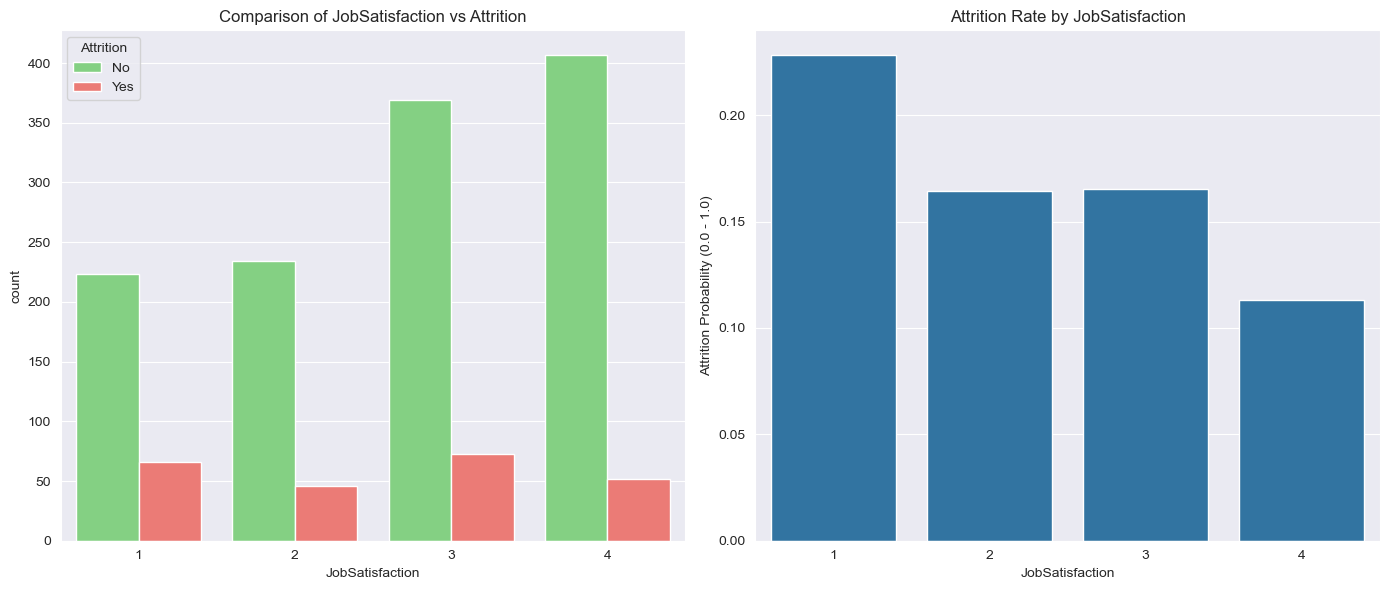

In [62]:
CategoricalVariables_targetPlots(df,"JobSatisfaction")

#### Performance Rating

In [63]:
df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [64]:
round(df.PerformanceRating.value_counts()/df.shape[0] * 100,2)

PerformanceRating
3    84.63
4    15.37
Name: count, dtype: float64

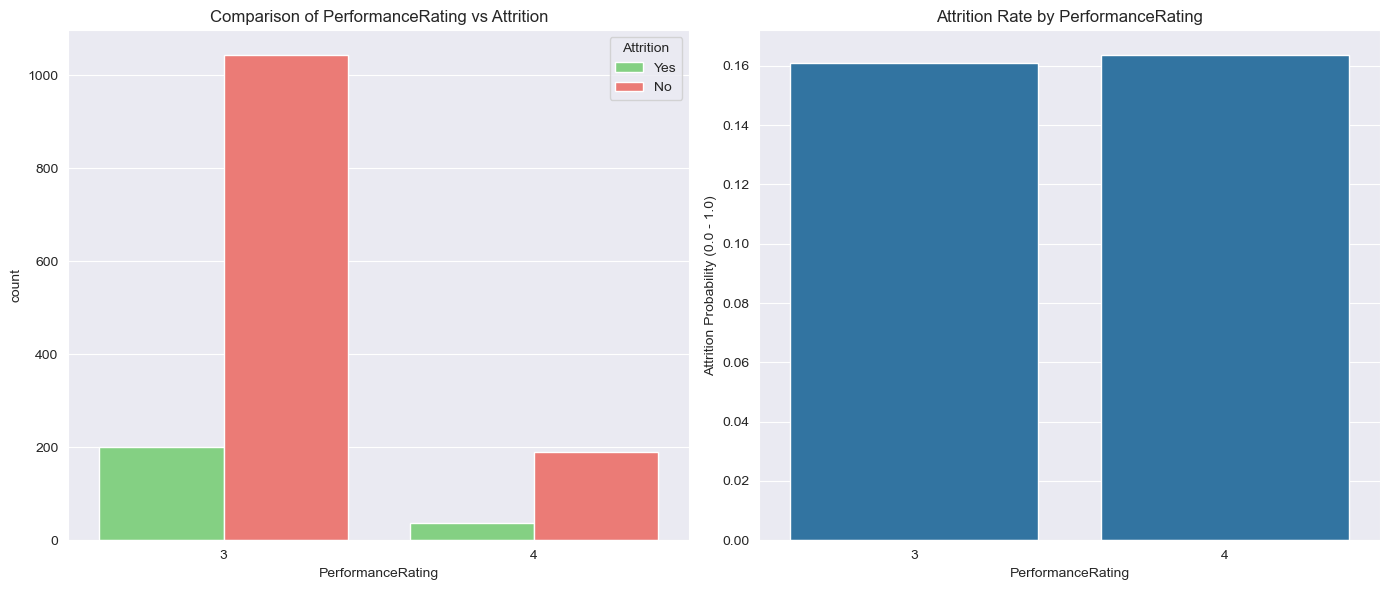

In [65]:
CategoricalVariables_targetPlots(df,"PerformanceRating")

#### Relationship Satisfaction

In [66]:
round(df.RelationshipSatisfaction.value_counts()/df.shape[0],2)

RelationshipSatisfaction
3    0.31
4    0.29
2    0.21
1    0.19
Name: count, dtype: float64

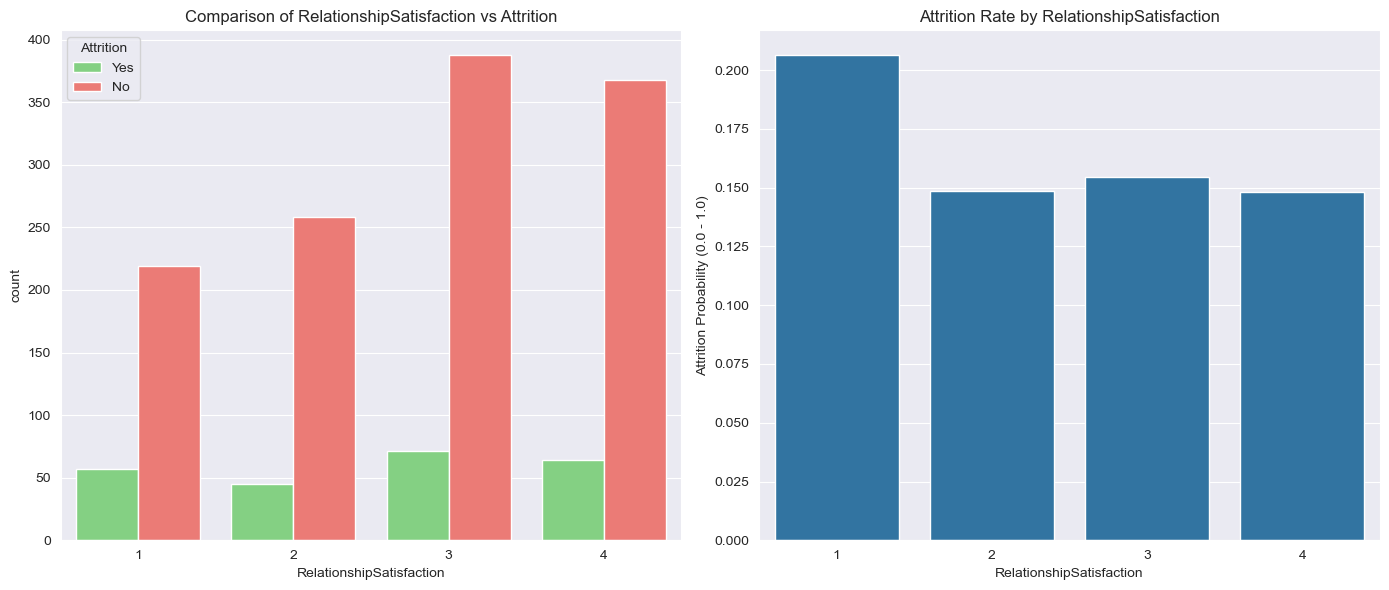

In [67]:
CategoricalVariables_targetPlots(df,"RelationshipSatisfaction")

#### WorkLife Balance

In [68]:
round(df.WorkLifeBalance.value_counts()/df.shape[0],2)

WorkLifeBalance
3    0.61
2    0.23
4    0.10
1    0.05
Name: count, dtype: float64

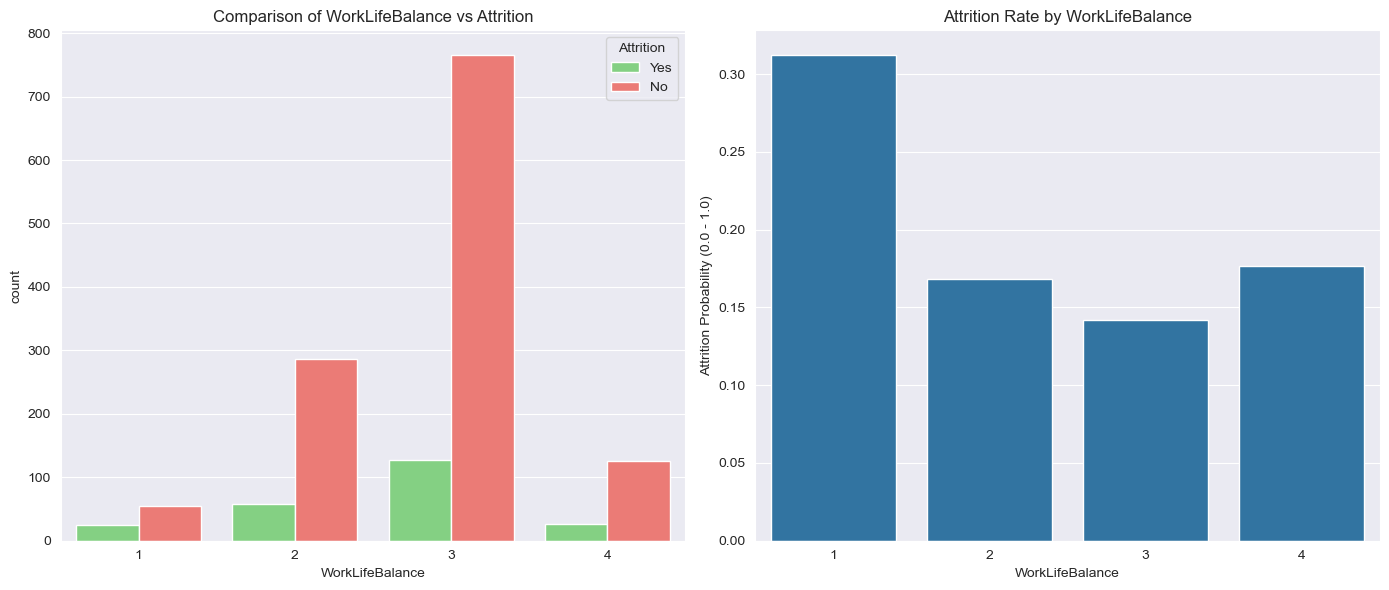

In [69]:
CategoricalVariables_targetPlots(df,"WorkLifeBalance")

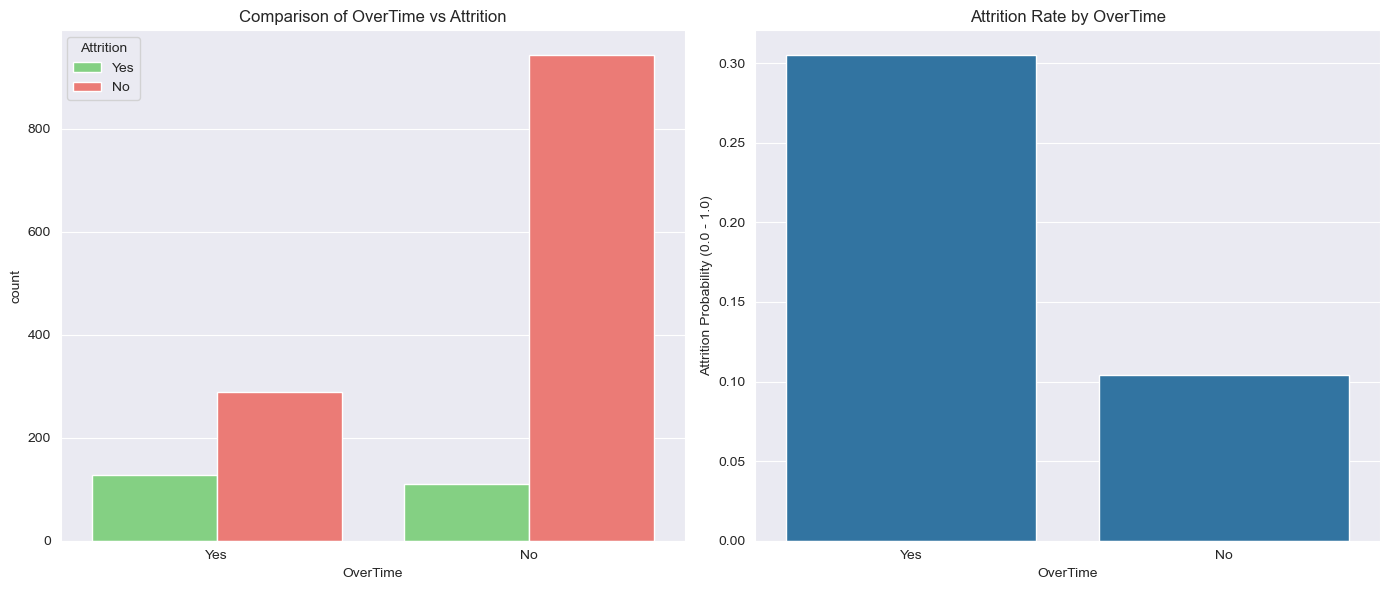

In [70]:

CategoricalVariables_targetPlots(df,"OverTime")

#### Business Travel

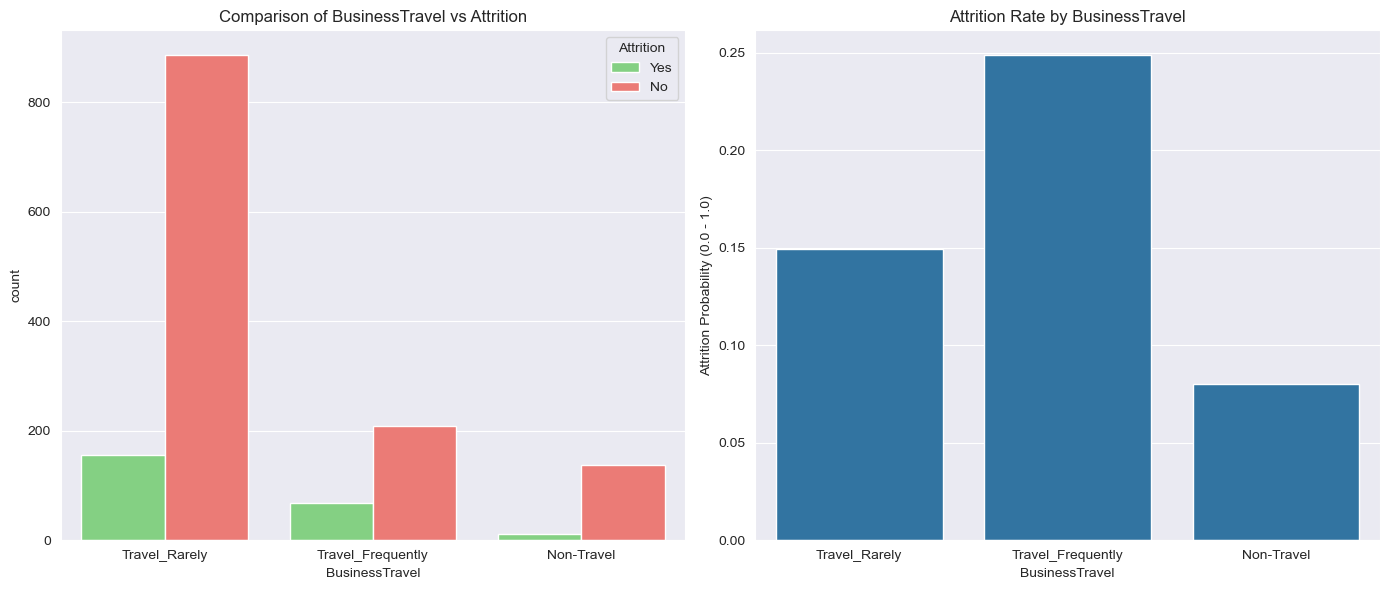

In [71]:
CategoricalVariables_targetPlots(df,segment_by="BusinessTravel")

#### Department

In [72]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

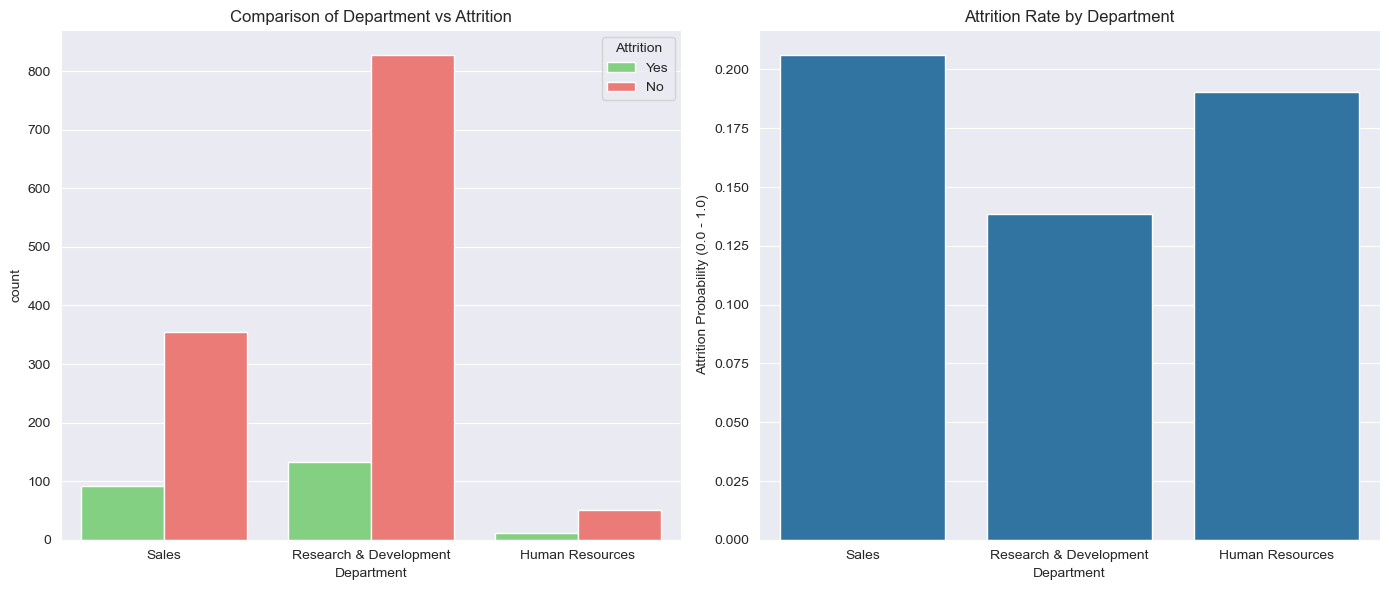

In [73]:
CategoricalVariables_targetPlots(df,segment_by="Department")

#### Education Field

In [74]:
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

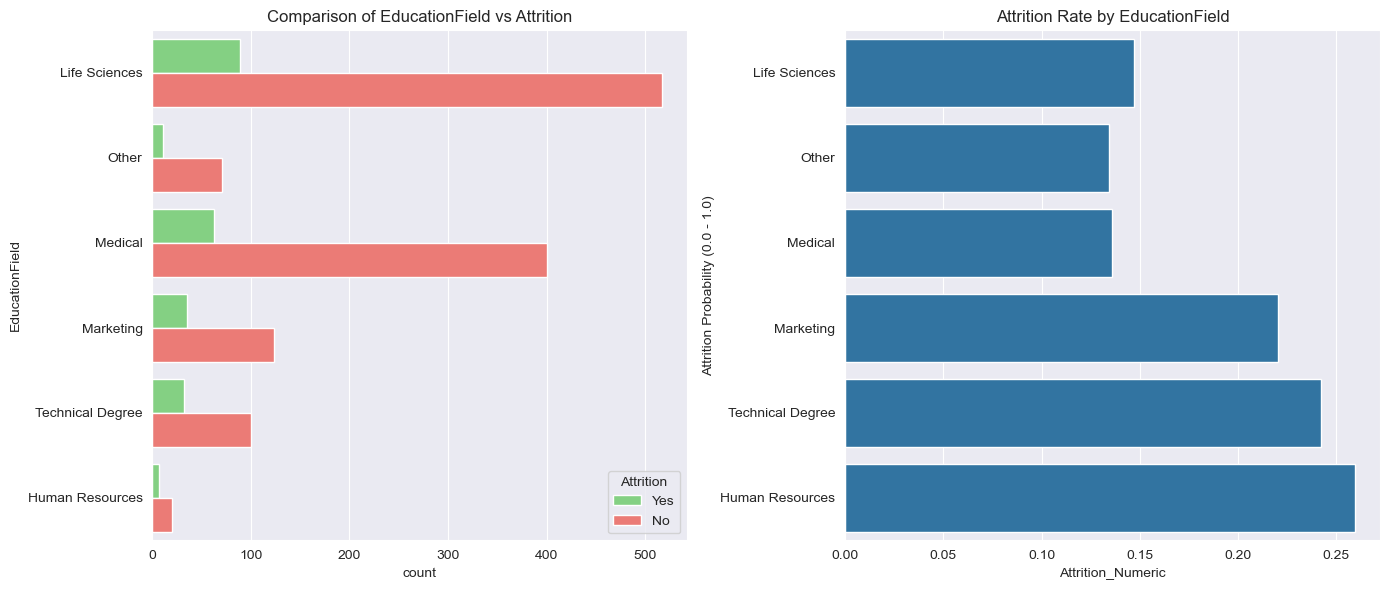

In [75]:
CategoricalVariables_targetPlots(df,"EducationField",invert_axis=True)

In [76]:

plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=df,ci=None)
plt.show()

ValueError: Could not interpret value `left` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x800 with 0 Axes>